In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification

In [3]:


# Generate a small synthetic dataset for Heart Disease Prediction (500 samples, 5 medical features)
X, y = make_classification(n_samples=500, n_features=5, n_classes=2, random_state=42)

# Define feature names based on medical relevance
feature_names = ['Age', 'Cholesterol', 'BloodPressure', 'MaxHeartRate', 'ST_Depression']

# Convert to DataFrame for easy processing
df = pd.DataFrame(X, columns=feature_names)
df['HeartDisease'] = y  # Target variable (0: No Disease, 1: Disease)

# Display dataset info
print("First few rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Information:")
print(df.info())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check the distribution of the target variable
print("\nDistribution of Heart Disease:")
print(df['HeartDisease'].value_counts())

First few rows of the dataset:
        Age  Cholesterol  BloodPressure  MaxHeartRate  ST_Depression  \
0  1.393097    -0.968344      -0.381594     -1.258335      -2.613271   
1 -0.940149     1.190646       0.186841      0.377961       1.021012   
2  0.695495     0.927840       0.062873      1.061077       1.357341   
3 -1.352234    -1.484898       0.200687      0.089946       0.753625   
4  1.010624    -0.209023      -0.007811      0.880669       0.930456   

   HeartDisease  
0             1  
1             0  
2             1  
3             0  
4             1  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            500 non-null    float64
 1   Cholesterol    500 non-null    float64
 2   BloodPressure  500 non-null    float64
 3   MaxHeartRate   500 non-null    float64
 4   ST_Depression  500 non-null    fl

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns='HeartDisease'),  # Features (drop the target column)
    df['HeartDisease'],               # Target variable
    test_size=0.2,                    # 20% of the data for testing
    random_state=42                   # Random seed for reproducibility
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test = scaler.transform(X_test)        # Transform the testing data using the same scaler

# Display the shapes of the resulting datasets
print("Training set shape (X_train):", X_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Training target shape (y_train):", y_train.shape)
print("Testing target shape (y_test):", y_test.shape)

Training set shape (X_train): (400, 5)
Testing set shape (X_test): (100, 5)
Training target shape (y_train): (400,)
Testing target shape (y_test): (100,)


Accuracy: 0.89
Confusion Matrix:
 [[46  7]
 [ 4 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89        53
           1       0.86      0.91      0.89        47

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



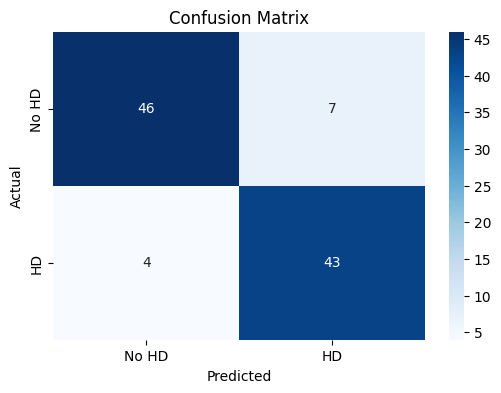

In [10]:
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No HD', 'HD'], yticklabels=['No HD', 'HD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.92
Confusion Matrix:
 [[49  4]
 [ 4 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        53
           1       0.91      0.91      0.91        47

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



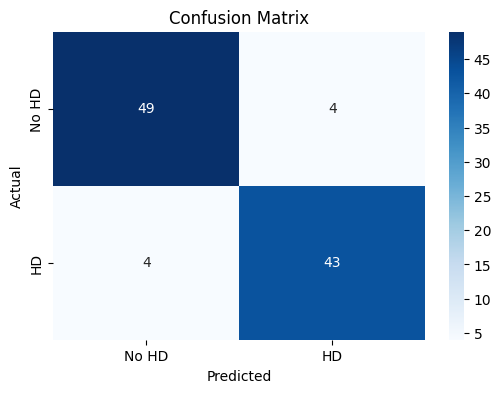

In [11]:
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No HD', 'HD'], yticklabels=['No HD', 'HD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

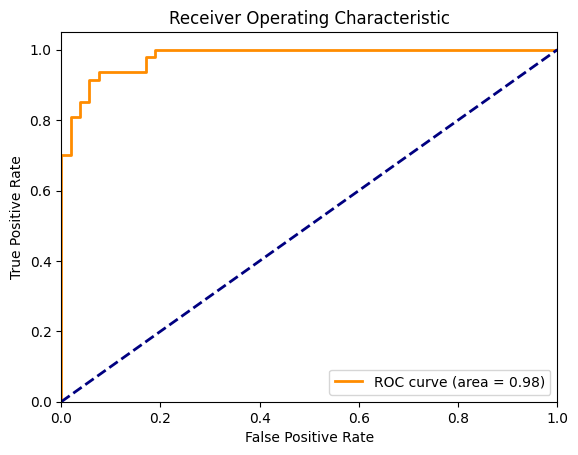

In [7]:
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()